In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 86% 57.0M/66.0M [00:01<00:00, 38.7MB/s]
100% 66.0M/66.0M [00:01<00:00, 50.6MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter

In [3]:
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
def PCA_ALGO(X,y):
    #PREPARATION DES DONNEES
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    X=NEW_X
    y=X.iloc[:,-1].values

    pca = PCA(n_components=2)
    pca_data=pca.fit_transform(X)
    print(pca_data.shape)
    pca_data=np.vstack((pca_data.T,y)).T
    print(pca_data.shape)
    print(pca_data)
    pca_df=pd.DataFrame(data=pca_data,columns=('PCA1','PCA2','Classe'))
    sns.FacetGrid(pca_df,hue='Classe',size=6).map(plt.scatter,'PCA1','PCA2').add_legend()
    plt.show()

In [5]:
df = pd.read_csv('creditcard.csv').astype(np.float32) #lecture du dataset
#standardisation 
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))
x = df.drop('Class', axis=1)
y = df['Class']
#décomposition TRAIN / TEST
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#ré-echantillonnage des données d'apprentissage 
rus=RandomUnderSampler() #SOUS-ECHANTILLONNAGE ALEATOIRE
X_train_rus, y_train_rus = rus.fit_sample(X_train, Y_train)

ros=RandomOverSampler() #SUR-ECHANTILLONNAGE ALEATOIRE
X_train_ros, y_train_ros = ros.fit_sample(X_train, Y_train)

smt=SMOTE() #SMOTE
X_train_smt, y_train_smt = smt.fit_sample(X_train, Y_train)

ada=ADASYN() #ADASYN-SMOTE
X_train_ada, y_train_ada = ada.fit_sample(X_train, Y_train)

Bl=BorderlineSMOTE() #BORDERLINE-SMOTE
X_train_Bl, y_train_Bl = Bl.fit_sample(X_train, Y_train)

TL=TomekLinks() #TOMEK LINKS
X_train_TL, y_train_TL = TL.fit_sample(X_train, Y_train)

NM=NearMiss() #NearMiss
X_train_NM, y_train_NM = NM.fit_sample(X_train, Y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

********** DATASET ORIGINAL **********
(227845, 2)
(227845, 3)
[[ 0.9682498  -1.3978479   0.        ]
 [-1.1111451   0.07779022  0.        ]
 [-1.9859221   0.60829264  0.        ]
 ...
 [-1.3656595   0.9504423   0.        ]
 [-1.409097    1.9463814   0.        ]
 [ 0.45629776 -1.2083925   0.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


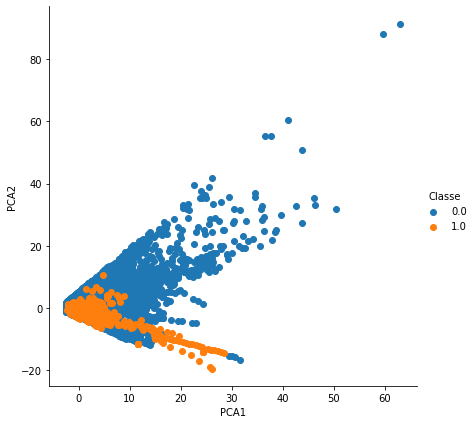

transactions de la X_TRAIN dataset ORIGINAL=Counter({0.0: 227454, 1.0: 391})
********** DATASET APRES RUS **********
(782, 2)
(782, 3)
[[-8.659632   1.4526273  0.       ]
 [-9.599361   0.8563376  0.       ]
 [-9.581871   0.8380739  0.       ]
 ...
 [15.101812  -6.801503   1.       ]
 [32.710583  -9.374087   1.       ]
 [ 1.2558758  1.434088   1.       ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


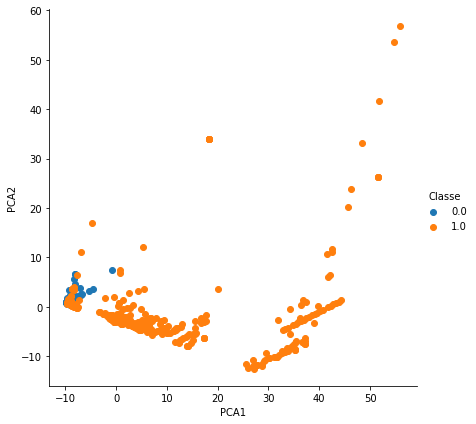

transactions de la X_TRAIN dataset apres RANDOM UNDERSAMPLING=Counter({0.0: 391, 1.0: 391})
********** DATASET APRES ROS **********
(454908, 2)
(454908, 3)
[[-9.112561    4.0559916   0.        ]
 [-9.604142    0.73716813  0.        ]
 [-9.523768    0.81639236  0.        ]
 ...
 [31.917515   -2.6270273   1.        ]
 [ 1.2765859  -0.6121766   1.        ]
 [ 5.02045    -4.476759    1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


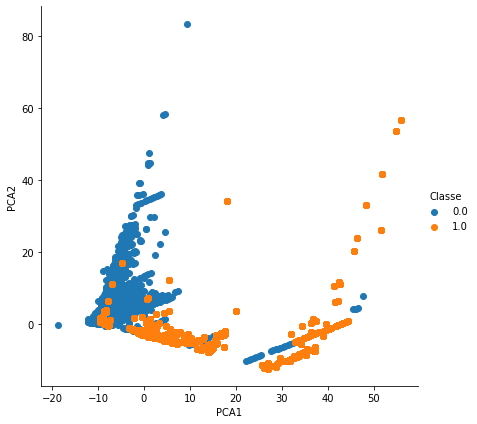

transactions de la X_TRAIN dataset apres RANDOM OVERSAMPLING=Counter({0.0: 227454, 1.0: 227454})
********** DATASET APRES SMOTE **********
(454908, 2)
(454908, 3)
[[-9.1436825   4.139057    0.        ]
 [-9.608723    0.7799489   0.        ]
 [-9.534122    0.8658981   0.        ]
 ...
 [12.332654   -4.1380696   1.        ]
 [-1.4021494  -2.3878386   1.        ]
 [ 0.09909952 -1.7057997   1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


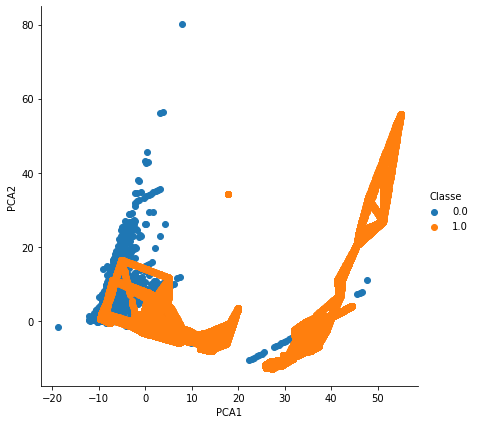

transactions de la X_TRAIN dataset apres SMOTE=Counter({0.0: 227454, 1.0: 227454})
********** DATASET APRES ADASYN SMOTE **********
(454930, 2)
(454930, 3)
[[-2.6421337   1.9817821   0.        ]
 [-2.7804894   1.4959811   0.        ]
 [-2.782458    0.7593982   0.        ]
 ...
 [ 7.465981    0.40225488  1.        ]
 [ 7.520586   -0.72771263  1.        ]
 [ 7.46166     0.40625829  1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


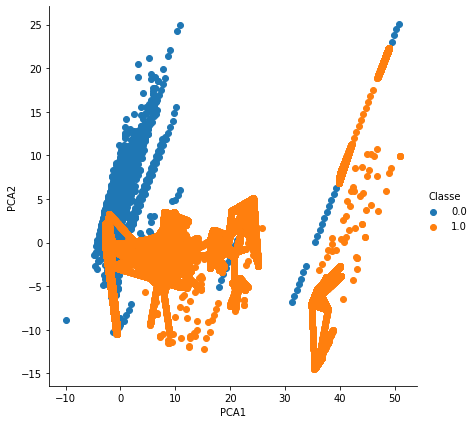

transactions de la X_TRAIN dataset apres ADASYN SMOTE=Counter({1.0: 227476, 0.0: 227454})
********** DATASET APRES BORDERLINE SMOTE **********
(454908, 2)
(454908, 3)
[[-5.161017   -3.46265     0.        ]
 [-5.2817764  -3.0034354   0.        ]
 [-5.264451   -2.4495718   0.        ]
 ...
 [ 5.945941   -2.1527758   1.        ]
 [-4.0050693  10.250025    1.        ]
 [34.341007   -0.35225025  1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


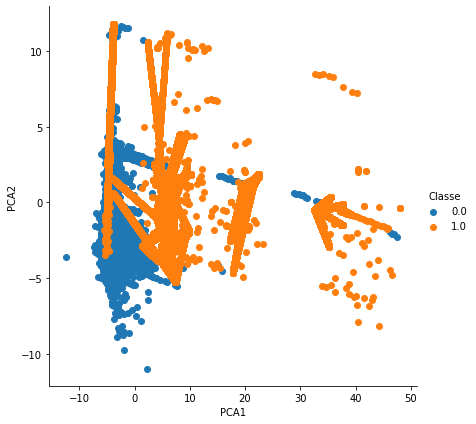

transactions de la X_TRAIN dataset apres BORDERLINE SMOTE=Counter({0.0: 227454, 1.0: 227454})
********** DATASET APRES TOMEKLINKS **********
(227826, 2)
(227826, 3)
[[ 0.96869785 -1.397907    0.        ]
 [-1.1108639   0.07741868  0.        ]
 [-1.9864198   0.60859853  0.        ]
 ...
 [-1.3655291   0.9502143   0.        ]
 [-1.4094299   1.946292    0.        ]
 [ 0.45674095 -1.2083521   0.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


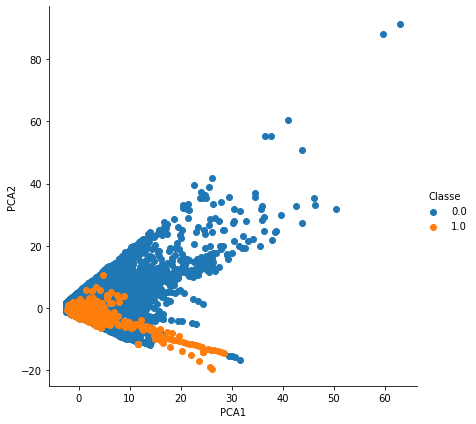

transactions de la X_TRAIN dataset apres TomekLinks=Counter({0.0: 227435, 1.0: 391})
********** DATASET APRES NEARMISS **********
(782, 2)
(782, 3)
[[-9.172502    0.8515277   0.        ]
 [-8.9557085   0.70350826  0.        ]
 [-9.212942    0.8534509   0.        ]
 ...
 [15.224853   -6.497192    1.        ]
 [32.827213   -9.288918    1.        ]
 [ 1.3553395   1.6490686   1.        ]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


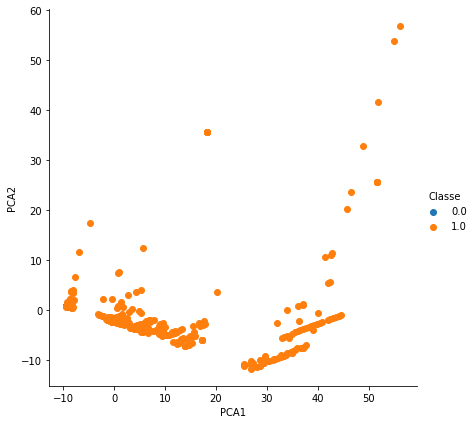

transactions de la X_TRAIN dataset apres Nearmiss=Counter({0.0: 391, 1.0: 391})


In [6]:
print("*"*10,"DATASET ORIGINAL","*"*10)
PCA_ALGO(X_train,Y_train)
print("transactions de la X_TRAIN dataset ORIGINAL={}".format(Counter(Y_train)))

print("*"*10,"DATASET APRES RUS","*"*10)
PCA_ALGO(X_train_rus,y_train_rus)
print("transactions de la X_TRAIN dataset apres RANDOM UNDERSAMPLING={}".format(Counter(y_train_rus)))

print("*"*10,"DATASET APRES ROS","*"*10)
PCA_ALGO(X_train_ros,y_train_ros)
print("transactions de la X_TRAIN dataset apres RANDOM OVERSAMPLING={}".format(Counter(y_train_ros)))

print("*"*10,"DATASET APRES SMOTE","*"*10)
PCA_ALGO(X_train_smt,y_train_smt)
print("transactions de la X_TRAIN dataset apres SMOTE={}".format(Counter(y_train_smt)))

print("*"*10,"DATASET APRES ADASYN SMOTE","*"*10)
PCA_ALGO(X_train_ada,y_train_ada)
print("transactions de la X_TRAIN dataset apres ADASYN SMOTE={}".format(Counter(y_train_ada)))

print("*"*10,"DATASET APRES BORDERLINE SMOTE","*"*10)
PCA_ALGO(X_train_Bl,y_train_Bl)
print("transactions de la X_TRAIN dataset apres BORDERLINE SMOTE={}".format(Counter(y_train_Bl)))

print("*"*10,"DATASET APRES TOMEKLINKS","*"*10)
PCA_ALGO(X_train_TL,y_train_TL)
print("transactions de la X_TRAIN dataset apres TomekLinks={}".format(Counter(y_train_TL)))

print("*"*10,"DATASET APRES NEARMISS","*"*10)
PCA_ALGO(X_train_NM,y_train_NM)
print("transactions de la X_TRAIN dataset apres Nearmiss={}".format(Counter(y_train_NM)))

